<h1 style="text-align:center;">Лабораторная работа №2</h1>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранную СЛАУ следующими методами (постараться избежать умножения матриц, использовать поэлементные записи): 
1. метод Гаусса с выбором главного элемента
2. метод LU-разложение (если применим)
3. метод Якоби
4. метод Зейделя
5. метод верхней релаксации
6. метод градиентного спуска
7. метод минимальных невязок
8. стабилизированный метод бисопряженных градиентов

*Для итерационных методов получить график убывания невязки в зависимости от итерации.

<h3 style="text-align:center;">Прямые методы</h3>

**1) Метод Гаусса с выбором главного элемента.**
- Прямой ход - приводим заданную матрицу A к верхнетреугольному виду:
    - находим главный (максимальный по модулю) элемент матрицы
    - меняем местами строки матрицы и элементы столбца решений так, чтобы главный элемент оказался в верхнем левом углу
    - меняем местами столбца матрицы и элементы столбца переменных так, чтобы главный элемент оказался в верхнем левом углу
    - делим нулевую строку матрицы и нулевой элемент столбца решений на главный элемент
    - вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
    - вычитаем из каждой строки матрицы нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
- повторяем весь алгоритм выше для всех матриц, получаемых из исходной сдвигом левого верхнего угла на один вправо и вниз
- последний элемент столбца решений делим на последний элемент матрицы, который делаем = 1
- Обратный ход:
    - вычисляем элементы столбец переменных
    - меняем в этом столбце порядок переменных в соответствии с найденным
- возвращаем столбец решений





In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
# формат вывода
np.set_printoptions(precision=5, suppress=True, formatter={'all': lambda x: f'{x:0.5f}'})

#почти все формулы - из методички Томск-СЛАУ :)


<img src="images/task_lab_2.png" alt="drawing" width="650"/>

In [173]:
'''Вариант Ж'''
a = 20 #константа - зависит от варианта задания a = 20
size = 100 #размер матриц
A = ((a-1)*np.eye(size) + np.ones(size)) #матрица А
f = np.zeros((size, 1)) 
for i in range(size): f[i] = i + 1 # столбец решений f

In [154]:
def norm3_vect(vect):
    return pow(sum(el**2 for el in vect), 0.5)


In [155]:
def swap_rows(A, row1, row2): #функция для смены строк в матрице
    A[[row1, row2]] = A[[row2, row1]]

def swap_columns(A, col1, col2): #функция для смены столбцов в матрице
    A[:, [col1, col2]] = A[:, [col2, col1]]

def find_max_el(A, iter): #функция для поиска главного элемента матрицы A[iter,iter]
    size = len(A) - iter
    main_element = A[iter,iter]
    i_main, j_main = iter, iter

    for i in range(iter, size): 
        for j in range(iter, size):
            if abs(A[iter:, iter:][i][j]) > abs(main_element):
                i_main, j_main = i, j
                main_element = A[iter:, iter:][i][j]
    return main_element, i_main, j_main

In [156]:
def gauss(A, f):
    print("Решение СЛАУ методом Гаусса с выбором макс элемента")
    size = len(A)
    if A.shape[0] != A.shape[1]:
        print("Матрица не квадратная, решение невозможно!")
        return 
    x = np.arange(size) #массив с порядком корней (порядок будет меняться при перестановке столбцов)

    #прямой ход алгоритма - приводим матрицу A к верхнетреугольному виду
    for iter in range(len(A)):
        ''' Добавим в алгоритм проверку - если на какой-то итерации алгоритма возникла нулевая строка - ответ будет выражаться 
        через одну из переменных (её берем за константу, все остальные переменные будут выражены через нее)'''
        if (len(A) != sum(int(np.any(el)) for el in A)):
            '''Количество переменных превышает количество уравнений, решение не однозначн'''
            print("ERROR! Матрица не квадратная, решение невозможно!")
            return 
        
        main_el, i_main, j_main = find_max_el(A, iter) #максимальный элемент текущей матрицы и его местонахождение
        
        if (i_main != iter): #если элемент еще не в нулевой строке
            swap_rows(A, iter, i_main) #меняем в текущей матрице нулевую строку и строку, содержащую главный элемент            
            swap_rows(f, iter, i_main) #то же самое - в столбце решений       
            
        if (j_main != iter): #если элемент еще не в нулевом столбце
            swap_columns(A, iter, j_main) #меняем в текущей матрице нулевой столбец и столбец, содержащий главный элемент
            swap_columns(x, iter, j_main) #то же самое - в строке порядка переменных
        
        if main_el != 0:
            A[iter:, iter:][0] /= main_el #делим нулевую строку текущей матрицы на главный элемент
            f[iter] /= main_el #делим нулевую строку текущего столбца решений на главный элемент
        else:
            print("ERROR! main_el = 0")
            return
    
        for i in range(size - iter - 1):   
            f[i+iter+1] -= (f[iter] * A[iter:, iter:][i+1][0])
            #вычитаем из каждого элемента нулевой в текущем столбце решений, умноженный на нулевой элемент нужной строки - получаем в начале каждой строки единицу
            A[iter:, iter:][i+1] -=  (A[iter:, iter:][0] * A[iter:, iter:][i+1][0])
            #вычитаем из каждой строки нулевую, умноженную на нулевой элемент нужной строки - получаем в начале каждой строки единицу
        
    f[-1] /= A[-1][-1]
    A[size-1][size-1] = 1


    
    #обратный ход алгоритма
    U  = np.zeros((size, 1)) #столбец решений
    for i in range(size-1, -1, -1):
        U[i] = f[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    #перестановка переменных в изначальном порядке
    ans = np.zeros((size, 1))
    for i in range(size):
        ans[int(x[i])] = U[i]
    
    return ans

In [157]:
start_time = time.time()

A_gauss = np.copy(A) #сохраним исходную матрицу А в отдельной переменной
f_gauss = np.copy(f) #и столбец решений тоже сохраним в отдельной переменной
#это - т к иначе python расценит разные numpy матрицы как ссылающиеся на один объект

u = gauss(A_gauss, f_gauss) #столбец решений

# Проверка - перемножаем и вычисляем норму разницы
error = norm3_vect(A@u - f) 

np.set_printoptions(formatter={'float': '{: 0.5e}'.format})
print("Погрешность метода = ", error, "\n", "Проверка: ", sep = "",end = "")
#проверяем на приблизительное равенство из-за машинных ошибок
if (error > 1e-5): print("Error")
else: print("OK")

time_gauss = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_gauss))

Решение СЛАУ методом Гаусса с выбором макс элемента
Погрешность метода = [ 2.22045e-15]
Проверка: OK
Время выполнения = 3.8922 мс


**2) LU - разложение.**
- Прямой ход - разделяем исходную матрицу А на верхнетреугольную U и нижнетреугольную L - в произведении они дают исходную
- Обратный ход:
    - из уравнения Ly = f получаем столбец y
    - из уравнения Ux = y получаем стообец x  


In [158]:
def LU_decomp(A):

    size = len(A)
    L = np.zeros((size,size))
    U = np.zeros((size,size))

    for i in range(size):
        L[i][i] = 1
        for j in range(i, size):
            Uij = (A[i][j] - sum(L[i][k] * U[k][j] for k in range(i)))
            if Uij == 0:
                print("Error! devision by 0")
                return
            U[i][j] = Uij
            #вычисляем элементы матриц L и U построчно, друг через друга
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]


    
    return L, U

In [159]:
def LU(A, f):
    print("Решение СЛАУ с помощью LU-разложения")
    size = len(A)
    
    #LU-разложение матрицы A
    LU_dec = LU_decomp(A)
    L = LU_dec[0]
    U = LU_dec[1]
    
    
    #обратный ход - решение СЛАУ
    #Ly = f 
    y = np.ones((size, 1))
    for i in range(size):
        y[i] = f[i] - sum(L[i][j] * y[j] for j in range(i))
    
    #Ux = y 
    x = np.ones((size, 1))
    for i in range(size-1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i+1, size))) / U[i][i]
    
    return x

In [160]:
start_time = time.time()

A_lu = np.copy(A) 
f_lu = np.copy(f) 

ans = LU(A_lu, f_lu)


# Проверка 
error = norm3_vect(A@ans - f)
np.set_printoptions(formatter={'float': '{: 0.5e}'.format})
print("Погрешность метода = ", error, "\n", "Проверка: ", sep = "",end = "")
if  (error > 1e-5): print("Error!") 
else: print("OK")

time_lu = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_lu))

Решение СЛАУ с помощью LU-разложения
Погрешность метода = [ 2.17558e-15]
Проверка: OK
Время выполнения = 4.2901 мс



<h3 style="text-align:center;">Итерационные методы</h3>

**3) Метод Якоби.**

- Задаем точность ε
- Пока невязка (норма) разницы произведения исходной матрицы и полученного столбца переменных x и столбца решений f больше нормы, проводим итерационный цикл:
    - вычисляем элементы нового столбца переменных через элементы старого и элементы исходной матрицы

    В зависимости от заданной точности пропорционально будет меняться количество итераций, которое понадобилось для приближения с такой точностью. Построим график зависимости количества итераций от заданной невязки. 

In [161]:
def Jacobi(A, f, x0, eps):
    
    print("Решение СЛАУ методом Якоби")
    size = len(A)

    x_old = np.copy(x0)
    x_new = np.copy(x0)
    iter = 0

    norm = norm3_vect(A @ x_new - f)
    norms = []
    while (norm > eps):
        for i in range(size):
            x_new[i] = 0
            for j in range(size):
                if (j != i):
                    x_new[i] = x_new[i] + A[i][j] * x_old[j]
            x_new[i] = (f[i] - x_old[i]) / A[i][i]
        x_old = x_new
        iter += 1
        norm = norm3_vect(A @ x_new - f)
        norms.append(norm)

        
    return x_new, iter, norms
        

In [162]:
start_time = time.time()
A_j = np.copy(A) 
f_j = np.copy(f)

eps = 1.00000e-5

u_0 = np.ones((size,1))
J = Jacobi(A_j, f_j, u_0, eps)
print("Количество итераций = ", J[1])

# Проверка 
x = J[0]
error = norm3_vect(A@x - f)
np.set_printoptions(formatter={'float': '{: 0.5e}'.format})
print("Погрешность метода = ", error, " < eps = ", eps, "\n", "Проверка: ", sep = "",end = "")
if  (error > eps): print("Error!") 
else: print("OK")

time_jacobi = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_jacobi))

discrepancy_J = J[2]

Решение СЛАУ методом Якоби
Количество итераций =  7
Погрешность метода = [ 3.67015e-06] < eps = 1e-05
Проверка: OK
Время выполнения = 8.6257 мс


**4) Метод Гаусса-Зейделя.**  
- Задаем точность ε
- Пока невязка (норма) разницы произведения исходной матрицы и полученного столбца переменных x и столбца решений f больше нормы, проводим итерационный цикл:
    - вычисляем элементы нового столбца переменных через элементы старого и элементы исходной матрицы

    В зависимости от заданной точности пропорционально будет меняться количество итераций, которое понадобилось для приближения с такой точностью. Построим график зависимости количества итераций от заданной невязки. 

In [163]:
def Seidel(A, f, x0, eps):
    
    print("Решение СЛАУ методом Зейделя")
    size = len(A)
    
    x_old = np.copy(x0)
    x_new = np.copy(x0)
    iter = 0

    norm = norm3_vect(A @ x_new - f)
    norms = []
    while (norm > eps):
        for i in range(size):
            sig = 0
            for j in range(i):
                sig += A[i][j] * x_new[j]
            for j in range(i+1, size):
                sig += A[i][j] * x_old[j]
            
            x_new[i] = (f[i] - sig) / A[i][i]
              
        x_old = x_new
        iter += 1
        norm = norm3_vect(A @ x_new - f)
        norms.append(norm)
        
    return x_new, iter, norms
        

In [164]:
start_time = time.time()
A_s = np.copy(A) 
f_s = np.copy(f)
eps = 1.00000e-5

u_0 = np.ones((size,1))
S = Seidel(A_s, f_s, u_0, eps)
print("Количество итераций = ", S[1])

# Проверка 
x = S[0]
error = norm3_vect(A@x - f)
np.set_printoptions(formatter={'float': '{: 0.5e}'.format})
print("Погрешность метода = ", error, " < eps = ", eps, "\n", "Проверка: ", sep = "",end = "")
if  (error > eps): print("Error!") 
else: print("OK")

time_seidel = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_seidel))

discrepancy_S = S[2]

Решение СЛАУ методом Зейделя
Количество итераций =  7
Погрешность метода = [ 4.87633e-06] < eps = 1e-05
Проверка: OK
Время выполнения = 8.7650 мс


**5)Метод верхней релаксации - SOR**

In [165]:
def SOR(A, f, x0, eps, w):
    
    size = len(A)
    
    x_old = np.copy(x0)
    x_new = np.copy(x0)
    iter = 0

    norm = norm3_vect(A @ x_new - f )
    norms = []
    while (norm > eps and iter < 1000):
        for i in range(size):
            sig = 0
            for j in range(i):
                sig += A[i][j] * x_new[j]
            for j in range(i+1, size):
                sig += A[i][j] * x_old[j]
            
            sig = (f[i] - sig) / A[i][i]
            
            x_new[i] = x_old[i] + w * (sig - x_old[i]) 

        x_old = x_new
        iter += 1
        norm = norm3_vect(A @ x_new - f)
        norms.append(norm)

    return x_new, iter, norms
            

In [166]:
start_time = time.time()
A_sor = np.copy(A) 
f_sor = np.copy(f)
eps = 1.00000e-5

w = 0.5

u_0 = np.ones((size,1))
sor = SOR(A_sor, f_sor, u_0, eps, w)
print("Количество итераций = ", sor[1])

# Проверка 
x = sor[0]
error = norm3_vect(A@x - f)
np.set_printoptions(formatter={'float': '{: 0.5e}'.format})
print("Погрешность метода = ", error, " < eps = ", eps, "\n", "Проверка: ", sep = "",end = "")
if  (error > eps): print("Error!") 
else: print("OK")

time_sor = 1000*(time.time() - start_time)
print("Время выполнения = {0:.4f} мс".format(time_sor))

discrepancy_sor = sor[2]

Количество итераций =  20
Погрешность метода = [ 9.26341e-06] < eps = 1e-05
Проверка: OK
Время выполнения = 14.8106 мс


Построим для 3х итерационных методов графики зависимости невязки от количества итераций, потраченных на достижение этой невязки

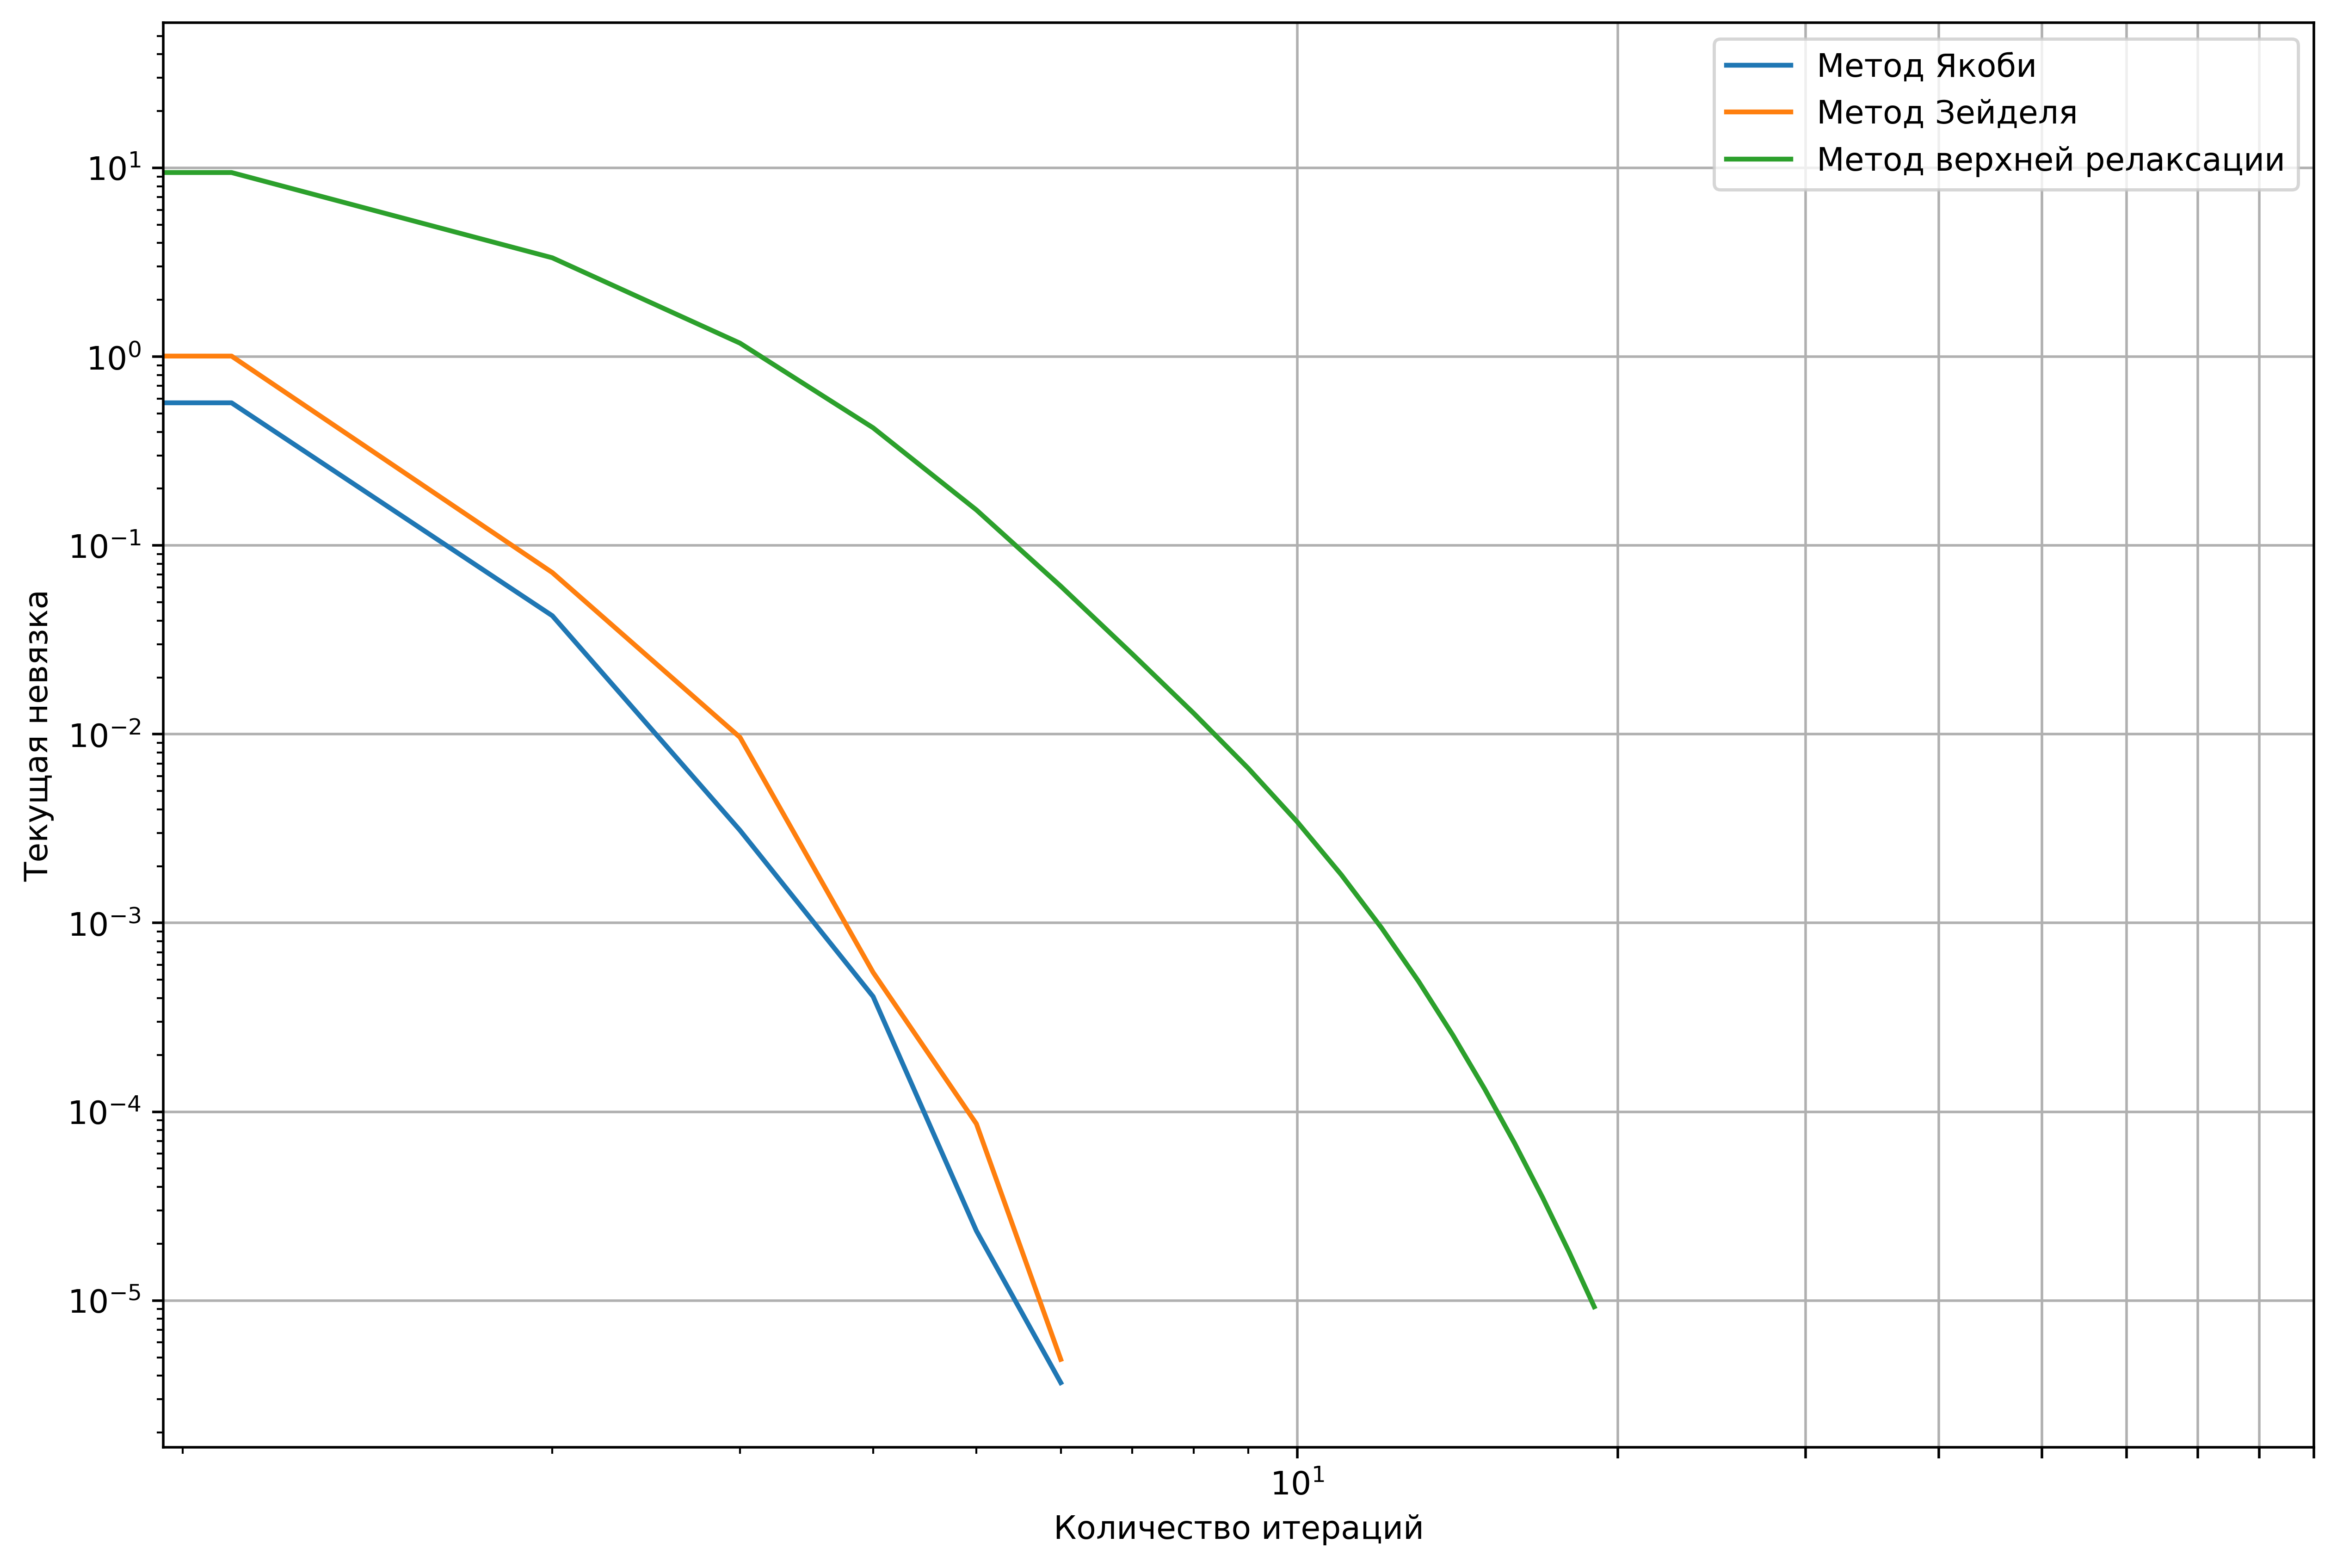

In [167]:
plt.figure(figsize = [12,8], dpi = 500)


plt.plot(np.arange(0, len(discrepancy_J)),   discrepancy_J,   label = "Метод Якоби")
plt.plot(np.arange(0, len(discrepancy_S)),   discrepancy_S,   label = "Метод Зейделя")
plt.plot(np.arange(0, len(discrepancy_sor)), discrepancy_sor, label = "Метод верхней релаксации")

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Количество итераций')
plt.ylabel('Текущая невязка')

plt.xticks(np.arange(start=10, stop=100, step = 10))

plt.legend()
plt.grid()
plt.show()

Заметим: при параметре оптимальности w = 1 метод верхних релаксаций абсолютно идетничен методу Зейделя, что видно из формулы             x_new[i] = x_old[i] + w * (sig - x_old[i]) 

In [168]:
from tabulate import tabulate
table = [['Gauss', 'LU', 'Jacobi', 'Seidel', 'SOR'], [time_gauss, time_lu, time_jacobi, time_seidel, time_sor]]
print("Сравнение алгоритмов по скорости, мс")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Сравнение алгоритмов по скорости, мс
╒═════════╤════════╤══════════╤══════════╤═════════╕
│   Gauss │     LU │   Jacobi │   Seidel │     SOR │
╞═════════╪════════╪══════════╪══════════╪═════════╡
│ 3.89218 │ 4.2901 │  8.62575 │  8.76498 │ 14.8106 │
╘═════════╧════════╧══════════╧══════════╧═════════╛


итерационные методы подпространства Крылова


**6)Метод градиентного спуска**

**7)Стабилизированный метод бисопряженных градиентов**

С неявным предобуславливанием.

In [169]:
def scalar_product(a, b):
    s = 0
    for i in range(len(a)):
        ss = a[i] * b[i] 
        s += ss

    return s

In [170]:
s = np.array([[-0.159],
 [-0.039], 
 [0.079]])
t = np.array([[-3.139],
 [-0.86],
 [1.38]])
print(scalar_product(s, t))

[ 6.41661e-01]


In [181]:
def BiCG_stab(A, f, x0, eps):
    
    size = len(A)

    #задаем столбцы r
    r_old = f - A@x0
    r_new = r_old
    r_ = r_old

    #задаем столбцы p
    p_old = np.zeros((size,1))
    p_new = np.zeros((size,1))
    
    #задаем столбцы v
    v_old = np.zeros((size,1))
    v_new = np.zeros((size,1))

    ro_old = 1

    a_old = 1
    
    w_old = 1

    x_old = np.copy(x0)
    x_new = np.copy(x0)

    iter = 0

    norm = 10

    while ((norm > eps)):

        ro_new = scalar_product(r_, r_old)

        if ro_new == 0:
            print("Этот метод не может решить данную задачу")
            return
            
        if i == 1:
            p_new = r_old
            
        else:
            b = (ro_new / ro_old)
            b = b * (a_old / w_old)
            p_new = r_old + b * (p_old - w_old * v_old)

        v_new = A @ p_new

        a_new = ro_new / scalar_product(r_, v_new)
        s = r_old - a_new * v_new
        
        t = A @ s
        
        w_new = scalar_product(t, s) / scalar_product(t, t)
        
        x_new = x_old
        x_new += w_new * s
        x_new += a_new * p_new

        r_new = s - w_new*t
        

        

        x_old = x_new
        v_old = v_new
        r_old = r_new
        
        a_old = a_new
        w_old = w_new
        p_old = p_new

        iter += 1    
        norm = ((norm3_vect(r_new))[0]) 
        
    return x_new, iter

In [182]:
A_ = np.copy(A) 
f_ = np.copy(f)
eps = 1.00000e-5

u_0 = np.zeros((size,1))
print(Jacobi(A_, f_, u_0, eps)[1])
BiCG_stab = BiCG_stab(A_, f_, u_0, eps)
print(BiCG_stab[1])

Решение СЛАУ методом Якоби
54
23
